<a href="https://colab.research.google.com/github/kim-dahun/python-study/blob/main/py20_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Movielens 데이터셋

* GitHub : https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/movielens

* movies.dat
  * movieID::Title::Genres
* ratings.dat
  * UserID::MovieID::Rating::TimeStamp
* Users.dat
  * UserID::Gender::Age::Occupation::Zip-code
* 모든 데이터 파일을 첫번째 줄부터 데이터가 작성되어져 있음.
* 컬럼 이름이 파일에 포함되어 있지 않음.

In [7]:
movies_cols = ['movie_id','title','genres']
raings_cols = ['user_id','movie_id','ratings','timestamp']
users_cols = ['user_id','gender','age','occupation','zip-code']

## Movies

In [5]:
movies_file='https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/movies.dat'

In [8]:
# movies.dat 파일 읽어서 데이터프레임 생성 :

movies = pd.read_csv(movies_file, sep='::', names=movies_cols, engine='python')

In [10]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [12]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


### 장르 분석

* 특정 장르에 해당하는 영화 개수 (예)
* 어떤 장르에 해당하는 영화가 가장 많은지

In [13]:
# 애니메이션 장르의 영화 찾기

animations = movies[movies.genres.str.contains('Animation')]

In [14]:
animations

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


In [15]:
# 로맨틱 코미디 장르

roco = movies[(movies.genres.str.contains('Romance')) & (movies.genres.str.contains('Comedy'))]

In [16]:
roco

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


* 가장 빈도수가 많은 장르?

* 장르 빈도수 순서



In [32]:
genrelist = movies.genres.str.split('|')
genres = []
for x in genrelist:

  for y in x:

    genres.append(y)

# genres = []
# for s in movies.genres:
#   genres.extend(s.split('|'))

In [33]:
genres

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 "Children's",
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Animation',
 "Children's",
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Thriller',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Adventure',
 'Romance',
 "Children's",
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Romance',
 'Drama',
 'Drama',
 'War',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Crime',
 'Thrill

In [57]:
tgc = pd.value_counts(genres)

In [58]:
tgc

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

<class 'pandas.core.series.Series'>
Index: 18 entries, Drama to Film-Noir
Series name: None
Non-Null Count  Dtype
--------------  -----
18 non-null     int64
dtypes: int64(1)
memory usage: 844.0+ bytes


<Axes: >

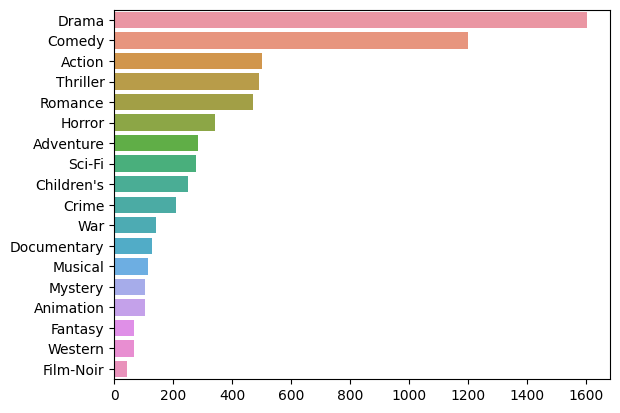

In [65]:
tgc.info()

sns.barplot(y=tgc.index, x=tgc.values)

In [86]:
# 연도별 개봉영화 수

years = movies.title.str[-5:-1]

In [90]:
years_vi = years.value_counts()

<Axes: >

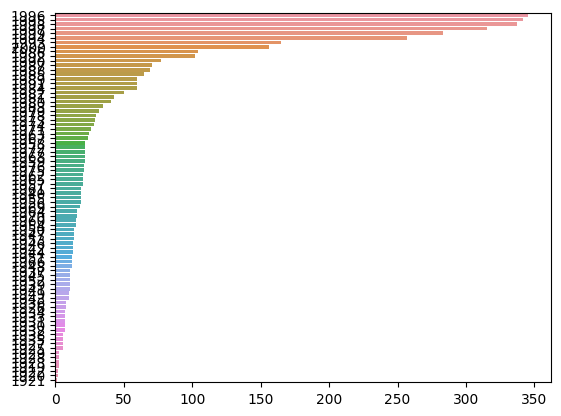

In [93]:
barp = sns.barplot(y=years_vi.index, x=years_vi.values)



<Axes: >

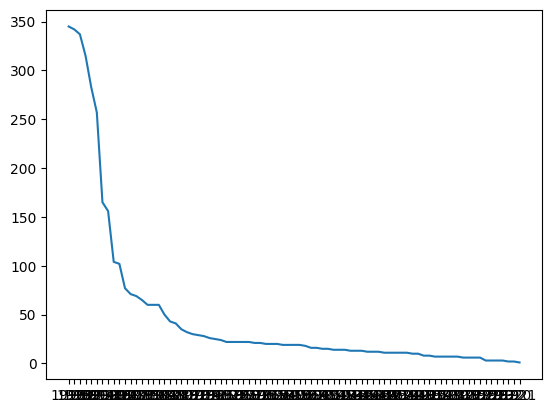

In [94]:
sns.lineplot(x=years_vi.index, y=years_vi.values)

### Users 데이터셋

In [95]:
file_path='https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/users.dat'

users = pd.read_csv(file_path, sep='::', names=users_cols, engine='python')

In [96]:
users

,user_id,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [97]:
users.head()

,user_id,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [98]:
users.tail()

,user_id,gender,age,occupation,zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


<Axes: xlabel='gender'>

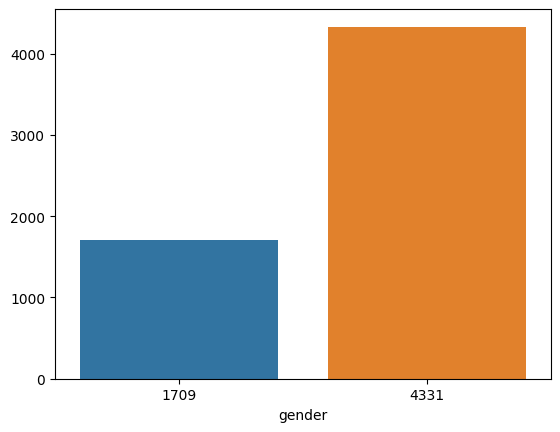

In [133]:
### 성별 빈도수
xx= users.groupby('gender')['gender'].count()

sns.barplot(data = xx, x=xx.index, y=xx.values)


<Axes: xlabel='ages'>

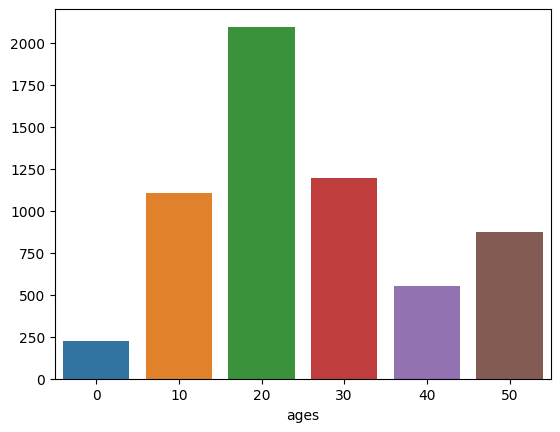

In [122]:
### 연령대 빈도수
ages = []
for x in users.age:

  ages.append((int(x)//10)*10)

users['ages']=ages

xxx = users.groupby('ages')['ages'].count()

sns.barplot(x=xxx.index, y=xxx.values)

In [117]:
### 직업군 빈도수

users.occupation

0       10
1       16
2       15
3        7
4       20
        ..
6035    15
6036     1
6037     1
6038     0
6039     6
Name: occupation, Length: 6040, dtype: int64

In [124]:
xxx2 = users.groupby('occupation')['occupation'].count()

<Axes: xlabel='occupation'>

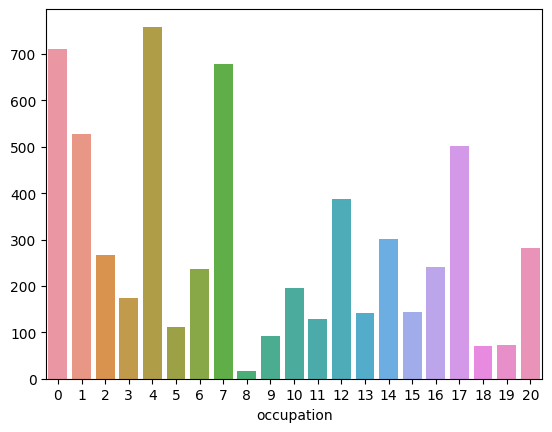

In [125]:
sns.barplot(x=xxx2.index, y=xxx2.values)